In [53]:
#IMPORTS NECESSARY

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [54]:
#GET DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [55]:
#DEFINING LABELS
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

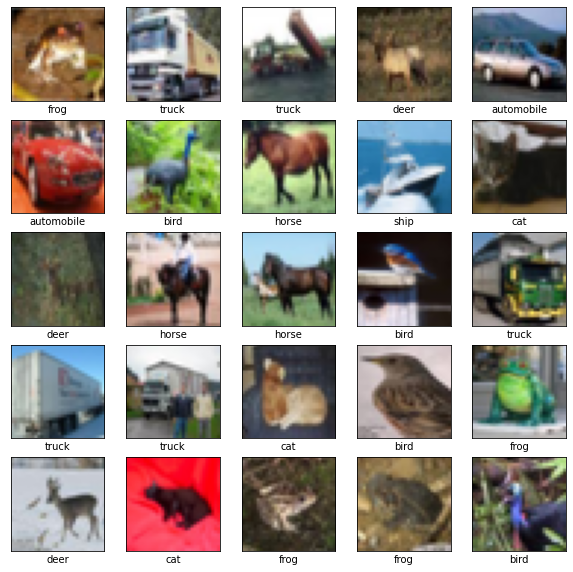

In [56]:
# SHOW DATASET
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
# CREATE EXTRACTION NETWORK (CNN)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2))) #PERFORM POOLLING TO REMOVE REDUNDANCY | WITH STRID = 2, OR BE JUMP OF TWO IN TWO
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # HERE IS A CONVOLUTION LAYER WITH 64 3X3 KERNELS (NEURONES) AND ACTIVATION LAYER WITH "RELU" FUNCTION
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
# SHOW NETWORK
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
# CREATE CLASSIFICATION NETWORK - FULLY-CONNECTED (MLP, SVM...)
model.add(layers.Flatten()) #PUT ALL DATA IN VECTOR COLUMN
model.add(layers.Dense(64, activation='relu')) #HERE A MLP LAYER WITH 64 KERNELS (NEURONIANS) AND RELU ACTIVATION
model.add(layers.Dense(10))

In [10]:
# SHOW NEURAL NETWORK
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [11]:
#MAKES MEDELO, SPECIFYING WHAT FUNCTION OF OPTIMIZATION AND METRICS
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#TRAIN THE NETWORK MODEL
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 100s 63ms/step - loss: 1.7927 - accuracy: 0.3376 - val_loss: 1.2951 - val_accuracy: 0.5315
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.2354 - accuracy: 0.5591 - val_loss: 1.0947 - val_accuracy: 0.6181
Epoch 3/10
1563/1563 [==============================] - 118s 76ms/step - loss: 1.0610 - accuracy: 0.6260 - val_loss: 1.0929 - val_accuracy: 0.6174
Epoch 4/10
1563/1563 [==============================] - 115s 73ms/step - loss: 0.9560 - accuracy: 0.6647 - val_loss: 0.9390 - val_accuracy: 0.6743
Epoch 5/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.8789 - accuracy: 0.6928 - val_loss: 0.9457 - val_accuracy: 0.6799
Epoch 6/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.8288 - accuracy: 0.7084 - val_loss: 0.9572 - val_accuracy: 0.6746
Epoch 7/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.7615 - accuracy: 0.7334 - val_loss: 0.

313/313 - 6s - loss: 0.8637 - accuracy: 0.7094


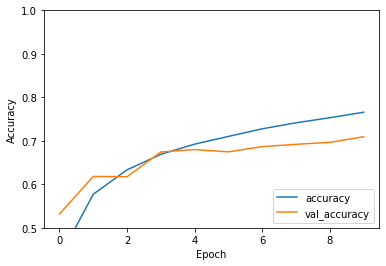

In [14]:
#GRAPHIC OF THE PERFORMANCE YOU SHOULD HAVE AND HAD
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

PERFORMS EVALUATION OF THE MEDELO WITH TEST DATA
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [15]:
#PERFORM THE PREDICTION UPON THE DATA
predictions = model.predict(test_images)

In [16]:
print(predictions)

[[-2.3770952  -2.66354    -1.1150705  ... -2.7577417   0.62407887
  -0.1456031 ]
 [ 5.197648    4.9953775  -0.9883956  ... -8.055285    9.999772
   1.5193088 ]
 [ 2.021315    1.2653165  -0.19517598 ... -3.3178198   4.070993
   1.2607234 ]
 ...
 [-6.4059105  -7.5955977   3.2558224  ...  1.0533509  -3.6679513
  -6.78963   ]
 [-0.5085119   2.2540712   1.5743413  ...  0.41851425 -3.6671383
  -2.4818997 ]
 [-4.4257436  -6.334922    0.254115   ... 10.254118   -7.628394
  -4.4562097 ]]


In [28]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

5
2
3
0
2
3
1
4
1
3


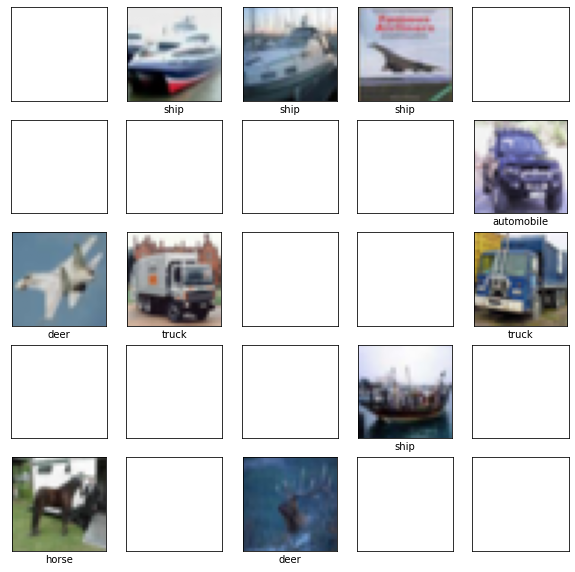

In [48]:
#VISUAL EVALUATION OF THE MODEL
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if np.int(np.around(predictions[i][0])) >= 0 and np.int(np.around(predictions[i][0])) <= 9:
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        t = np.argmax(predictions, axis=1)
        plt.xlabel(class_names[t[i]])
plt.show()

In [49]:
model.save('model_CNN_1')

INFO:tensorflow:Assets written to: model_CNN_1/assets


In [52]:
new_model = tf.keras.models.load_model('model_CNN_1')